# LAKICA LETICIA
## M23B23/023
#### 1.Use the "HousingData.xlsx" dataset to develop a CRISP data mining pipeline.(60 Marks)

## PHASE 1: 1. Business Understanding
#### TARGET VARIABLE - Tax(property tax)
#### Objective
##### Property tax reflects municipal valuation and correlates strongly with housing desirability, location, and quality. Accurately predicting TAX helps:

#####    - Homebuyers estimate ownership costs
#####    - Municipalities audit assessment fairness
#####    - Real estate analysts identify undervalued zones

## PHASE 2: DATA UNDERSTANDING

#### Loading dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('HousingData.xlsx')
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


##### Using Info to find out the nuber of ientries and datatypes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


##### Using Shape to find out the number of columns and rows

In [ ]:
df.shape

(506, 15)

##### Using descriptive statistics to find out the mean ,standard deviation, min and max value, count and quartiles

In [5]:
df.describe()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


#### Checking for null values

In [6]:
df.isnull().sum()

PID        0
CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64

#### Generating a heatmap to help me choose target independent variables

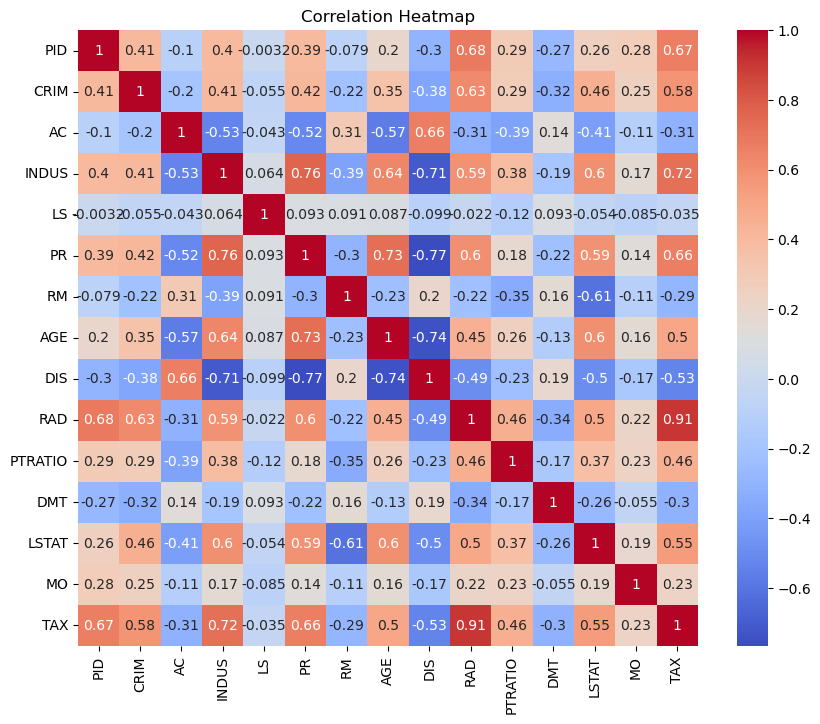

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### According to this heatmap RAD, INDUS, LSTAT, PR, CRIM, PID correlation with TAX which is my target variable

#### Checking for outliers

ValueError: num must be an integer with 1 <= num <= 6, not 7

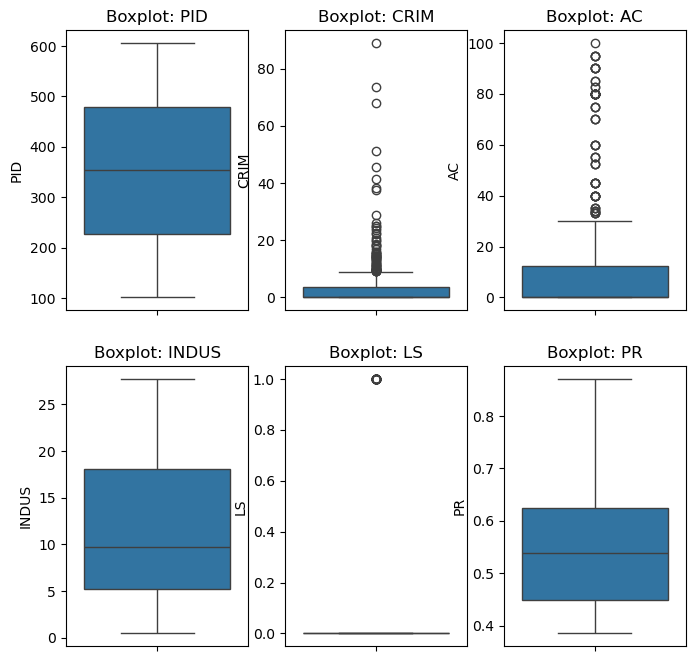

In [12]:
# Focus on skewed or extreme-prone features
cols_to_check = ['PID','CRIM','AC','INDUS','LS','PR','RM','AGE','DIS','RAD','PTRATIO','MT','LSTAT','MO','TAX']

plt.figure(figsize=(8, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()



### PHASE 3: DATA PREPARTION

### Imputing with median
##### Using imputation on all missing variables except my target variable where i am droping the missing value. This is because i am trying to maintain the accuracy of my model. Imputation is robust to outliers and preserves distribution

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['CRIM','LS','PR','RAD','DIS','LSTAT','MO','AGE', 'RM', 'PTRATIO', 'DMT']] = imputer.fit_transform(df[['CRIM','LS','PR','RAD','DIS','LSTAT','MO','AGE', 'RM', 'PTRATIO', 'DMT']])
df = df.dropna(subset=['TAX'])


#### Checking there are still  null values


In [8]:
df.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64